# Supervised Learning: K-Nearest Neighbors
Author: Neil Ashtekar

We will apply machine learning to a university admittance dataset. Using historical exam data and admittance records, we will create a classifier that determines if an applicant will be admitted given their exam scores. We will use the k-nearest neighbors algorithm, implemented without scikit-learn.

 
Start by importing necessary packages and loading our dataset.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 6]

In [2]:
# get dataset
data = pd.read_csv('exam_scores.csv')
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Looking at the first few datapoints, it appears that students who got high scores on both exams were admitted to the university, while those with low scores were not admitted. Let's setup our features and labels, and visualize the data.

In [3]:
# setup features X and labels y
X = data.values[:, [0, 1]]
y = data.values[:, -1]

In [4]:
# visualize data
def viz(show=True):
    """ Creates visualization of all training points and corresponding admittance """
    for i in range(X.shape[0]):
        if y[i] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='green')
        else:
            plt.scatter(X[i, 0], X[i, 1], color='red')
    plt.title('Exam Score vs Admittance')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    if show:
        plt.show()
    return None

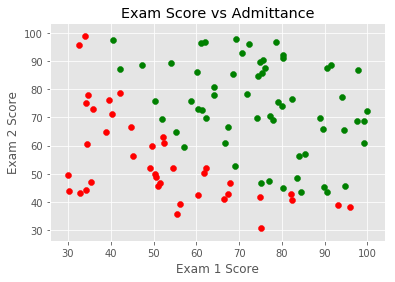

In [5]:
viz()

Looks like we were right -- students who did well on both exams were usually admitted, while students who did poorly on each exam were usually denied. Let's create a k-nearest neighbors classifier to make predictions on future applicants.

In [6]:
# create classifier
def predict(inputs, k=5, show=True, perform_return=False):
    """ Makes prediction on a single new point, input form [exam1_score, exam2_score]"""
    # iterate over all points, finding distance between training points and test point
    distances = []
    for i in range(X.shape[0]):
        distances.append(np.sqrt((X[i, 0] - inputs[0]) ** 2 + (X[i, 1] - inputs[1]) ** 2))
        
    # find the indices of the k smallest distances (k nearest neighbors)
    nearest_neighbors = np.argpartition(distances, k)
    
    # if more than half of the k nearest neighbors were admitted, predict admitted    
    if np.sum((y[nearest_neighbors[:k]] == 1).astype(int)) > k / 2:
        admit = 1
        
    # if more than half of the k nearest neighbors were denied, predict denied
    elif np.sum((y[nearest_neighbors[:k]] == 1).astype(int)) < k / 2:
        admit = 0
        
    # otherwise, unable to make a prediction
    else:
        admit = None
        
    # plot test point, k-nearest neighbors
    if show:
        print('\n\nPredicts Admitted') if admit else print('\n\nPredicts Denied')
        viz(show=False)
        plt.scatter(inputs[0], inputs[1], color='black', s=100)
        plt.scatter(X[nearest_neighbors[:k], 0], X[nearest_neighbors[:k], 1], 
                   color='black', marker='x', s=100)
        plt.show()
    
    # return admittance if specified
    return (None if not perform_return else admit)

Now that our classifier is made, we can start making predictions!



Predicts Admitted


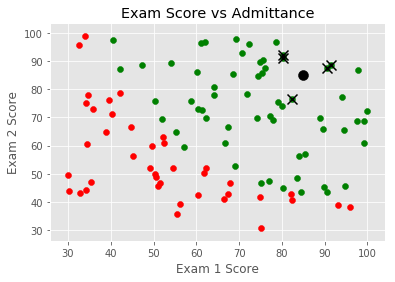



Predicts Denied


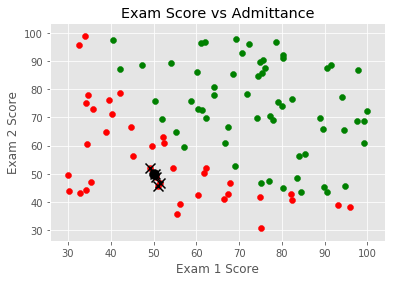



Predicts Denied


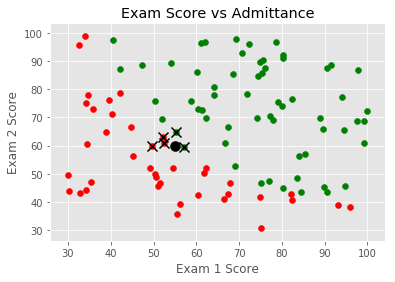

In [7]:
# make some predictions
predict([85, 85], k=5)
predict([50, 50], k=5)
predict([55, 60], k=5)

Our classifier seems to be working for k = 5! Let's try out different k values. Remember that k should be odd -- we have two classes, and we need a majority to make a prediction.



Predicts Denied


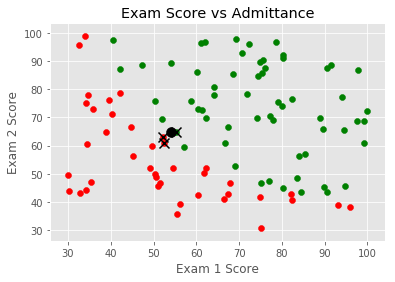



Predicts Admitted


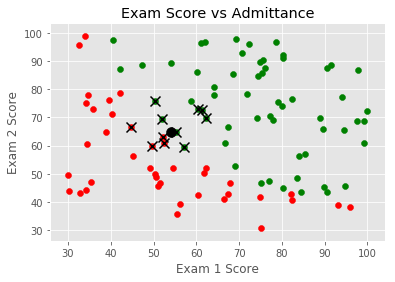

In [8]:
# try out different numbers of neighbors (k should be odd)
predict([54, 65], k=3)
predict([54, 65], k=11)

Note that in the above example, different k values resulted in different predictions for the same point!

In [9]:
def decision_boundary(k):
    """ Plots decision boundary (shaded region) for given k """
    print('\n\nDecision Boundary for k =', k)

    X1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
    X2 = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
    
    # plot a bunch of large points covering all possible exam scores
    for i in X1:
        for j in X2:
            if predict(inputs=[i, j], k=k, show=False, perform_return=True) == 1:
                plt.scatter(i, j, color='lightgreen', s=100)
            elif predict(inputs=[i, j], k=k, show=False, perform_return=True) == 0:
                plt.scatter(i, j, color='lightpink', s=100)

    # plot actual data on top
    viz(show=False)
    plt.show()
    return None

Now that we've made a function to determine decision boundaries, let's see some!



Decision Boundary for k = 1


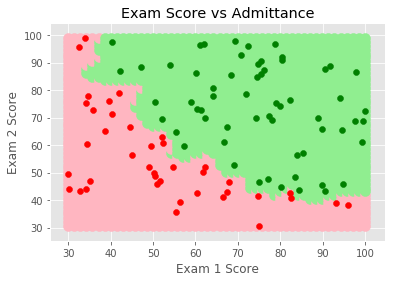

In [10]:
decision_boundary(1)

k = 1 results in a jagged decision boundary. Let's try k = 2.



Decision Boundary for k = 2


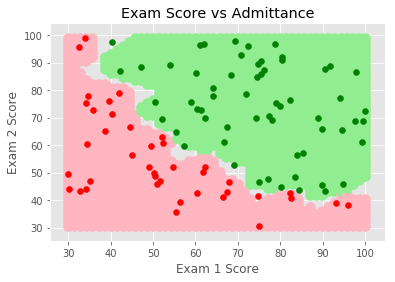

In [11]:
decision_boundary(2)

Notice how k = 2 results in some areas left unclassified. This is because some areas have 'divided' nearest neighbors: one green nearest neighbor and one red nearest neighbor. The algorithm cannot classify these points. Now try k = 5:



Decision Boundary for k = 5


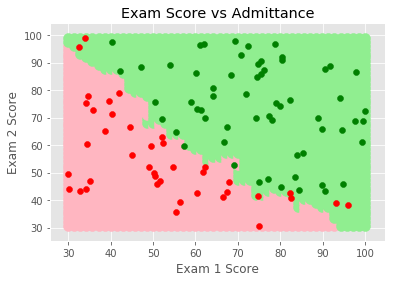

In [12]:
decision_boundary(5)

The decision boundary for k = 5 is smoother than k = 1 or k = 2, and leaves no points unclassified. What about a higher k?



Decision Boundary for k = 25


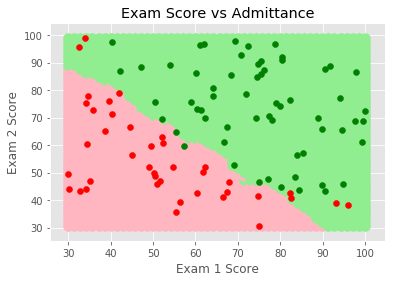

In [13]:
decision_boundary(25)

The decision boundary for k = 25 is even smoother, to the extent that some points are misclassified!

### K-Nearest Neighbors is a simple but powerful classifier.
This example might seem trivial, but the point is to illustrate how the algorithm works. Intuitively, k-nearest neighbors uses distance to classify points based on similarity. K-Nearest Neighbors is a powerful classifier that works in applications including:
- handwritten digit recognition
- plant or animal species classification
- economic forecasting


### Why is this machine learning?
You do not need to explicitly specify how to complete the task of predicting admittance. 

Consider non-machine learning approaches to this problem. These 'rules-based' solutions could include:
- specifying cutoffs for each exam (ex: students need at least a 60 on the first exam and 70 on the second exam to be admitted)
- specify cutoff for both exams (ex: the sum of both exam scores must be at least 130 for a student to be admitted)

These approaches require explicity settings cutoffs for exam scores. This means that the programmer must manually view the data and determine correlations between the features and labels. Machine learning does this implicitly, so you don't have to. 